In [1]:
# !python -m pip install -r ../requirements.txt
# !python -m pip install -e ../libs

# What is this notebook for ?

Once we have the annotation done in roboflow, we will do below tasks
1. Download the roboflow meta-data and dataset
2. Filter out unwanted data
3. check few samples on bounding boxes
4. Prepare the dataset for training/baseline

## Download roboflow meta-data
I have shared with annotators to tag the images as hard, blurry, assumed, adjusted, and done. I will include done & exclude hard and blurry ones.
- hard: its hard to do the annotation, ignoring it.
- blurry: the image is too blurry to annotate.
- assumed: assumption made in annotating. a very good guess though.
- adjusted: removed few pre-annotations which are not clear.
- done: i am done with adjusting the pre-annotations.

In [1]:
from binsense.cli.run_rfdataset_downloader import run_metadata_crawler
import logging

logging.basicConfig(level=logging.INFO, format='%(asctime)s %(levelname)s : %(message)s')


# copy the below data from the browser after sign in @ app.robolflow.com
#   access brower's network tab to get to the api call to see the details.
# the Roboflow REST api doesn't give consistent results, so relying on
#   api used on the browser by app.robolflow.com
run_metadata_crawler(
    cookie_str = 'ajs_anonymous_id=e4279315-ae21-40d5-861f-b51169f23e3a; __stripe_mid=a758133a-6f5f-407c-bb09-1b062d1a80699f6794; ajs_user_id=eEYy11ONL8bl5ZlkZHqx7JE1SF92; _cioid=eEYy11ONL8bl5ZlkZHqx7JE1SF92; __cuid=69e19e9bc24c4e23a72f10d840ff2c20; amp_fef1e8=eb7f5880-ecfb-4aa4-bdd2-115ce74ba350R...1hdsm3e31.1hdsm401m.15.o.1t; crisp-client%2Fsession%2F234b80f4-8fae-44e3-be30-be6f98ac8b9c=session_19ee147e-5b56-45da-bccb-c20684a34ddc; cookie_utms={%22host%22:%22blog.roboflow.com%22%2C%22path%22:%22/difference-semantic-segmentation-instance-segmentation/%22%2C%22referrer%22:%22https://www.google.com/%22}; _gcl_au=1.1.674121529.1710332965; _zitok=acdd5307d582a64a181a1711360412; amplitude_idundefinedroboflow.com=eyJvcHRPdXQiOmZhbHNlLCJzZXNzaW9uSWQiOm51bGwsImxhc3RFdmVudFRpbWUiOm51bGwsImV2ZW50SWQiOjAsImlkZW50aWZ5SWQiOjAsInNlcXVlbmNlTnVtYmVyIjowfQ==; _ga=GA1.1.52696650.1697715628; crisp-client%2Fsession%2Fd5d3c29f-9108-4cd7-8296-580b989bc9bc=session_191e7835-22a4-43b0-aceb-f5f45cc08855; __session=eyJhbGciOiJSUzI1NiIsImtpZCI6Il9PQzZaZyJ9.eyJpc3MiOiJodHRwczovL3Nlc3Npb24uZmlyZWJhc2UuZ29vZ2xlLmNvbS9yb2JvZmxvdy1wbGF0Zm9ybSIsIm5hbWUiOiJuaXRlc2ggYyIsInBpY3R1cmUiOiJodHRwczovL2xoMy5nb29nbGV1c2VyY29udGVudC5jb20vYS9BQ2c4b2NKY3RSdUxzMnpMVUVRWGg0RDFTeHEwN0ZUQ1d4QU5GUTNZVC1Fb1Z3V1ZvSVFcdTAwM2RzOTYtYyIsIndvcmtzcGFjZXMiOnsiZUVZeTExT05MOGJsNVpsa1pIcXg3SkUxU0Y5MiI6Im93bmVyIn0sImF1ZCI6InJvYm9mbG93LXBsYXRmb3JtIiwiYXV0aF90aW1lIjoxNzExNzAyMDY2LCJ1c2VyX2lkIjoiZUVZeTExT05MOGJsNVpsa1pIcXg3SkUxU0Y5MiIsInN1YiI6ImVFWXkxMU9OTDhibDVabGtaSHF4N0pFMVNGOTIiLCJpYXQiOjE3MTE4NDY5MjUsImV4cCI6MTcxMjI3ODkyNSwiZW1haWwiOiJyZWRkeS5uaXRlc2hAZ21haWwuY29tIiwiZW1haWxfdmVyaWZpZWQiOnRydWUsImZpcmViYXNlIjp7ImlkZW50aXRpZXMiOnsiZ29vZ2xlLmNvbSI6WyIxMDA2NDQ5NDEzNjExNzIzMTExNDkiXSwiZW1haWwiOlsicmVkZHkubml0ZXNoQGdtYWlsLmNvbSJdfSwic2lnbl9pbl9wcm92aWRlciI6Imdvb2dsZS5jb20ifX0.EH0p-GWohUcbL9yenwD33N9mFNhhrJT_-I3WRixZk11Fz6s3U9db1u47HKaqKz6RfbR1wgM73KgUWzdtV6u2FKnvr_IRIn14Xowcd6m1eL_KEwYOU5v4mJhywILa8bExNhk6kynI3z8FGv-HR32lK7w1WC6zDNIQYOnmdpHIdTPJ4EnWOHp7jZ8OMZ1sEgJK4O8Brw_70slW0qrwEaUAMrbYGmT6MeBBL90D9Xd14BxCSK_js8s4eKt820nAn0HYNuqKapmdWZBYAy27av7BUxTybJHrfvhT8CUE8k-EF7vH8-TBBTwDGhV9OeUFZoTqMvbJTuTM3e0EULAIcOMFVA; _ga_7RNES0270G=GS1.1.1711902639.37.1.1711902640.0.0.0; amplitude_id_11ee28f1673d40b5f704a83b880a5ddbroboflow.com=eyJkZXZpY2VJZCI6ImYyY2JhZWIyLTI4NjktNGNhMi1iYjc2LWEzNTZlZGFhZDI0NlIiLCJ1c2VySWQiOiJlRVl5MTFPTkw4Ymw1WmxrWkhxeDdKRTFTRjkyIiwib3B0T3V0IjpmYWxzZSwic2Vzc2lvbklkIjoxNzExOTM4ODM4NDM2LCJsYXN0RXZlbnRUaW1lIjoxNzExOTM4ODM4ODUyLCJldmVudElkIjoxMDkxLCJpZGVudGlmeUlkIjoxNTczLCJzZXF1ZW5jZU51bWJlciI6MjY2NH0=; _ga_SEKT4K1EWR=GS1.1.1711938838.97.1.1711938839.0.0.0',
    project_id = 'PedxdvWMh6obbp6GmpGm',
    workspace_id = 'eEYy11ONL8bl5ZlkZHqx7JE1SF92',
    ann_group='bins'
)

2024-03-31 21:33:03,353 INFO : number of columns = 14
2024-03-31 21:33:03,365 INFO : backing up /Users/n0c09jf/code/github/binsense/_data/bin/robo_metadata.csv to /Users/n0c09jf/code/github/binsense/_data/bin/robo_metadata.csv.1.bkp
2024-03-31 21:33:03,412 INFO : crawling roboflow.com:   0%|          | 0/3080 [00:00<?, ?it/s]
2024-03-31 21:33:14,803 INFO : crawling roboflow.com:  13%|█▎        | 400/3080 [00:11<01:16, 34.82it/s]
2024-03-31 21:33:27,541 INFO : crawling roboflow.com:  26%|██▌       | 800/3080 [00:24<01:09, 32.77it/s]
2024-03-31 21:33:47,759 INFO : crawling roboflow.com:  52%|█████▏    | 1600/3080 [00:44<00:38, 38.42it/s]
2024-03-31 21:34:36,939 INFO : crawling roboflow.com: 100%|██████████| 3080/3080 [01:33<00:00, 29.33it/s]


roboflow metadata downloaded at /Users/n0c09jf/code/github/binsense/_data/bin/robo_metadata.csv


In [2]:
import pandas as pd
from binsense.dataprep.config import DataPrepConfig

cfg = DataPrepConfig()
rf_meta_df = pd.read_csv(cfg.rfmeta_file_path, dtype={'image_name': str, 'bbox_label': str})
rf_meta_df.sort_values(by=['image_name', 'bbox_label'], inplace=True)
rf_meta_df.head()


,rf_image_id,image_name,tag,is_jithu,is_mythili,is_nitesh,is_raghu,is_adjusted,is_assumed,is_blurry,is_done,is_hard,bbox_label,bbox_count
0,P2SkkGQnD9cBTXInoafR,00016.jpg,train,0,0,0,0,0,0,0,0,1,B0033UNIQC,11
1,P2SkkGQnD9cBTXInoafR,00016.jpg,train,0,0,0,0,0,0,0,0,1,B00E9J3MLM,1
2,fmxcxMoja8jSpGAkxC2F,00017.jpg,train,0,0,0,0,0,0,0,1,0,B0033UNIQC,9
3,fmxcxMoja8jSpGAkxC2F,00017.jpg,train,0,0,0,0,0,0,0,1,0,B00E9J3MLM,1
5,sRyflEcP3d70egcTghlS,00037.jpg,train,0,0,0,0,1,0,0,1,0,B00F908YU4,1


In [3]:
user_tags = ['is_adjusted', 'is_assumed', 'is_blurry', 'is_done', 'is_hard']
def calc_prec(portion, total) -> float:
    return round(portion/total * 100, 1)

def calc_tag_perc(user_tag, df):
    cnt_y = df[df[user_tag] == 1].shape[0]
    return cnt_y, calc_prec(cnt_y, df.shape[0])

for user_tag in user_tags:
    print(user_tag, f'{calc_tag_perc(user_tag, rf_meta_df)}%')

df = rf_meta_df[rf_meta_df['is_done'] == 1]
df = df.query('is_hard != 1 & is_blurry != 1')
print(f'train data available: {df.shape[0]}({calc_prec(df.shape[0], rf_meta_df.shape[0])}%)')

is_adjusted (90, 1.5)%
is_assumed (138, 2.2)%
is_blurry (44, 0.7)%
is_done (672, 10.9)%
is_hard (131, 2.1)%
train data available: 574(9.4%)


## Download dataset generated from Roboflow
I have generated a version(1) on Roboflow https://app.roboflow.com/nitesh-c-eszzc/binsense_bbox_mini/1

In [1]:
from binsense.cli.run_rfdataset_downloader import run_download_dataset
import os
import logging

logging.basicConfig(level=logging.INFO, format='%(asctime)s %(levelname)s : %(message)s')

api_key = os.environ.get('ROBOFLOW_MY_API_KEY')
run_download_dataset(
    project='binsense_bbox_mini', 
    workspace='nitesh-c-eszzc', 
    version=2, api_key=api_key)

2024-03-31 21:24:01,583 INFO : backing up /Users/n0c09jf/code/github/binsense/_data/bin/robo_download to /Users/n0c09jf/code/github/binsense/_data/bin/robo_download.1.bkp


loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to /Users/n0c09jf/code/github/binsense/_data/bin/robo_download in yolov8:: 100%|██████████| 6169/6169 [00:13<00:00, 443.62it/s]


roboflow dataset downloaded at /Users/n0c09jf/code/github/binsense/_data/bin/robo_download


## Validate the downloaded data with the original dataset
Does below checks
1. all image_names on roboflow match the dataset
2. all labels on roboflow match the dataset
3. for each image label and bounding box count should be less-than/equal-to that of the  dataset

In [1]:
from binsense.cli.run_rfdataset_validator import run_validator
import logging

logging.basicConfig(level=logging.INFO, format='%(asctime)s %(levelname)s : %(message)s')
"SUCCESS" if run_validator() else "FAILED"

2024-03-31 22:15:30,416 INFO : loading bin-metadata:   0%|          | 0/3875 [00:00<?, ?it/s]
2024-03-31 22:15:33,529 INFO : loading bin-metadata:  10%|▉         | 387/3875 [00:03<00:28, 122.25it/s]
2024-03-31 22:15:36,652 INFO : loading bin-metadata:  20%|█▉        | 774/3875 [00:06<00:24, 127.25it/s]
2024-03-31 22:15:43,302 INFO : loading bin-metadata:  40%|███▉      | 1548/3875 [00:12<00:19, 117.06it/s]
2024-03-31 22:15:58,508 INFO : loading bin-metadata:  80%|███████▉  | 3096/3875 [00:28<00:08, 91.38it/s]
2024-03-31 22:16:07,576 INFO : loading bin-metadata: 100%|██████████| 3875/3875 [00:37<00:00, 89.17it/s]
2024-03-31 22:16:10,230 INFO : reading DataTag.TRAIN files:  10%|█         | 270/2697 [00:02<00:20, 120.58it/s]
2024-03-31 22:16:12,539 INFO : reading DataTag.TRAIN files:  20%|█▉        | 539/2697 [00:04<00:19, 109.06it/s]
2024-03-31 22:16:16,643 INFO : reading DataTag.TRAIN files:  40%|███▉      | 1077/2697 [00:08<00:11, 137.70it/s]
2024-03-31 22:16:24,448 INFO : reading Data

validation successful: True
rfmeta: not_empty: True	
rfmeta: image_count: True	
rfmeta: label_count: True	
rfmeta: bbox_count: True	
rfds: not_empty: True	
rfds: image_count: True	
rfds: label_count: True	
rfds: bbox_count: True


True

### Randomly sample to check the bounding boxes

In [4]:
import pandas as pd
from binsense.dataprep.config import DataPrepConfig
from binsense.dataprep.roboflow_util import RoboflowDatasetReader
from binsense.dataset_util import DataTag


cfg = DataPrepConfig()
df = pd.read_csv(cfg.rfmeta_file_path, dtype={'image_name': str, 'bbox_label': str})
df = df.query('is_done == 1 & is_hard != 1 & is_blurry != 1')
sample_image_names = df['image_name'].sample(6).to_list()
print(sample_image_names)

ds = RoboflowDatasetReader(cfg.dataset_download_path).read()
imgs_data = ds.get_images(DataTag.TRAIN)
imgs_data.extend(ds.get_images(DataTag.VALID))
sample_imgs_data = list(filter(lambda img_data: img_data.name in sample_image_names, imgs_data))

['02904.jpg', '02564.jpg', '00119.jpg', '00303.jpg', '00421.jpg', '02047.jpg']


2024-04-01 04:08:10,368 INFO : reading DataTag.TRAIN files:  10%|█         | 270/2697 [00:02<00:19, 122.72it/s]
2024-04-01 04:08:12,572 INFO : reading DataTag.TRAIN files:  20%|█▉        | 539/2697 [00:04<00:17, 123.70it/s]
2024-04-01 04:08:16,967 INFO : reading DataTag.TRAIN files:  40%|███▉      | 1077/2697 [00:08<00:12, 126.40it/s]
2024-04-01 04:08:25,501 INFO : reading DataTag.TRAIN files:  80%|███████▉  | 2153/2697 [00:17<00:03, 136.70it/s]
2024-04-01 04:08:29,720 INFO : reading DataTag.TRAIN files: 100%|██████████| 2697/2697 [00:21<00:00, 150.18it/s]
2024-04-01 04:08:30,019 INFO : reading DataTag.VALID files:  10%|█         | 39/383 [00:00<00:02, 140.74it/s]
2024-04-01 04:08:30,307 INFO : reading DataTag.VALID files:  20%|██        | 77/383 [00:00<00:02, 134.95it/s]
2024-04-01 04:08:30,801 INFO : reading DataTag.VALID files:  40%|███▉      | 153/383 [00:01<00:01, 148.63it/s]
2024-04-01 04:08:31,765 INFO : reading DataTag.VALID files:  80%|███████▉  | 305/383 [00:02<00:00, 165.74i

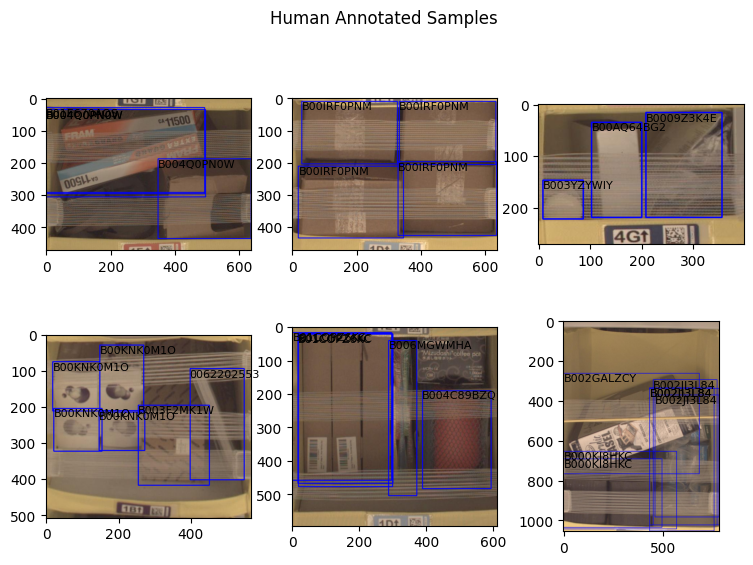

In [5]:
from binsense.dataset_util import BoundingBox, ImageData
from binsense.owlv2.utils import center_to_corners_format_numpy
from binsense.plot_utils import show_images_with_bboxes
from binsense.img_utils import center_to_corners, scale_bboxes
from typing import List

import numpy as np

import PIL, logging

logging.basicConfig(level=logging.INFO, format='%(asctime)s %(levelname)s : %(message)s')

def format_bbox(bbox_data: BoundingBox, img_data: ImageData) -> np.array:
    bbox_centers = np.array([[
        bbox_data.center_x, bbox_data.center_y, 
        bbox_data.width, bbox_data.height
    ]])
    bbox_corners = center_to_corners(bbox_centers)
    scaled_bbox_corners = scale_bboxes(bbox_corners, (img_data.width, img_data.height))
    return scaled_bbox_corners[0]

sample_imagearrs = []
sample_bboxes = []
sample_bbox_labels = []
for img_data in sample_imgs_data:
    img_pil = PIL.Image.open(img_data.path)
    img_data.width = img_pil.width
    img_data.height = img_pil.height
    img_data.normalized = False
    sample_imagearrs.append(np.array(img_pil))
    bboxes = ds.get_bboxes(img_data.name)
    sample_bbox_labels.append([bbox.label for bbox in bboxes])
    sample_bboxes.append([ format_bbox(bbox, img_data) for bbox in bboxes ])

show_images_with_bboxes(
    sample_imagearrs, sample_bboxes, 
    sample_bbox_labels, grid=(2, 3), 
    title='Human Annotated Samples')

# Prepare dataset for training/baseline

(train|eval)_pipeline(dir_path), where dir_path contains (train|val|test)/images, (train|val|test)/labels, query_embeddings, data.yaml
- images: images folder
- labels: labels folder (each image has a txt file with labels)
- data.yaml: label index
- query_embeddings: has embedding index & embeddings.safetensors

## pick the best crop for each bbox label
1. build a dataframe with image_name, bbox_label, bbox_area, bbox_idx
2. get the image_name, bbox_idx with max bbox_area for each bbox_label
3. build a dataset to pass to model

In [1]:
import pandas as pd
from binsense.dataprep.config import DataPrepConfig
from binsense.cli.owlv2.run_bbox_embedder import run_embedder

import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(levelname)s : %(message)s')


cfg = DataPrepConfig()
bbox_df = pd.read_csv(cfg.rfmeta_file_path, dtype={'image_name': str, 'bbox_label': str})
bbox_df = bbox_df.query('is_done == 1 & is_hard != 1 & is_blurry != 1 & tag == "train"')
bbox_labels = bbox_df['bbox_label'].unique()
run_embedder(len(bbox_labels), batch_size=4, test_run=True)

2024-03-31 19:51:02,406 INFO : vision_config is None. initializing the Owlv2VisionConfig with default values.
2024-03-31 19:51:04,220 INFO : backed up /Users/n0c09jf/code/github/binsense/_data/bin/embed_store/partition_count.dat to /Users/n0c09jf/code/github/binsense/_data/bin/embed_store/partition_count.dat.1.bkp
2024-03-31 19:51:04,223 INFO : backed up /Users/n0c09jf/code/github/binsense/_data/bin/embed_store/embeddings-par0.safetensors to /Users/n0c09jf/code/github/binsense/_data/bin/embed_store/embeddings-par0.safetensors.1.bkp
2024-03-31 19:51:05,183 INFO : reading DataTag.TRAIN files:  10%|█         | 270/2697 [00:00<00:04, 522.11it/s]
2024-03-31 19:51:05,632 INFO : reading DataTag.TRAIN files:  20%|█▉        | 539/2697 [00:00<00:03, 594.94it/s]
2024-03-31 19:51:06,548 INFO : reading DataTag.TRAIN files:  40%|███▉      | 1077/2697 [00:01<00:02, 611.41it/s]
2024-03-31 19:51:08,323 INFO : reading DataTag.TRAIN files:  80%|███████▉  | 2153/2697 [00:03<00:00, 600.13it/s]
2024-03-31 1

In [3]:
from binsense.embed_datastore import SafeTensorEmbeddingDatastore

# load the embedding store created by above run & check for few embeddings
embedding_store = SafeTensorEmbeddingDatastore(
    cfg.embed_store_dirpath, 
    read_only=True
)

keys_iter = embedding_store.get_keys()
keys = [k for k in keys_iter]
print("total embeddings", len(keys))

e = embedding_store.get(keys[0])
print(keys[0], e.shape)

e = embedding_store.get_many(keys[2:4])
print(keys[2], next(iter(e.values())).shape)

e = embedding_store.get('unknown')
print(e.shape if not e is None else 'None')

total embeddings 10
0062080644 torch.Size([512])
007145151X torch.Size([512])
None
